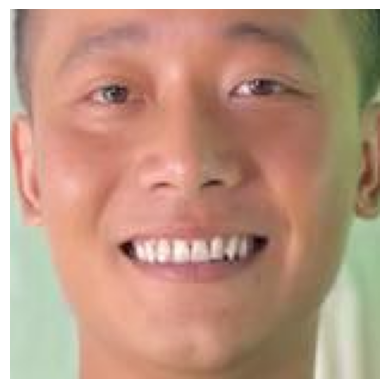

Thời gian xử lý: 0.46 giây.


In [8]:
import face_recognition as fr
from PIL import Image
import time
import matplotlib.pyplot as plt

start = time.time()

img_test = fr.load_image_file("./dataset/00004/ql2.jpg")
face_locations = fr.face_locations(img_test)
idx = 1

for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = img_test[top:bottom, left:right]
    face_image = Image.fromarray(face_image)
    
    # Display the image using Matplotlib
    plt.imshow(face_image)
    plt.axis('off')  # Hide the axis
    plt.show()

print("Thời gian xử lý: %.2f giây." % (time.time() - start))

Thời gian xử lý: 0.10 giây.


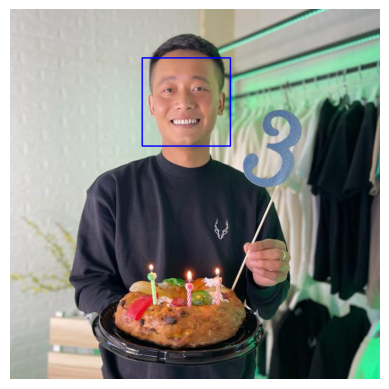

In [9]:
import cv2
import time
import matplotlib.pyplot as plt

start = time.time()
haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Make sure the image path is correct
img_test = cv2.imread("./dataset/00004/ql2.jpg")

if img_test is None:
    print("Error: Image not found or unable to open.")
else:
    img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

    face_locations = haarcascade.detectMultiScale(
        img_gray, scaleFactor=1.1, minNeighbors=4, flags=cv2.CASCADE_SCALE_IMAGE, minSize=(30, 30))

    for (x, y, w, h) in face_locations:
        img_test = cv2.rectangle(img_test, (x, y), (x+w, y+h), (255, 0, 0), 2)

    print("Thời gian xử lý: %.2f giây." % (time.time() - start))

    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()

Thời gian xử lý: 0.28 giây.


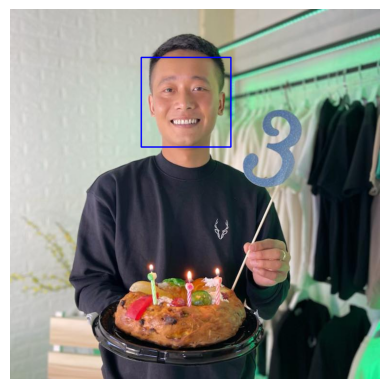

In [10]:
from deepface import DeepFace
import time
import cv2
import matplotlib.pyplot as plt

start = time.time()

# Đảm bảo đường dẫn ảnh chính xác
img_test_path = "./dataset/00004/ql2.jpg"
img_test = cv2.imread(img_test_path)

# Tìm vị trí khuôn mặt
face_locations = DeepFace.extract_faces(img_test_path)

# Vẽ hình chữ nhật xung quanh khuôn mặt
for face_location in face_locations:
    facial_area = face_location['facial_area']
    x = facial_area['x']
    y = facial_area['y']
    w = facial_area['w']
    h = facial_area['h']
    img_test = cv2.rectangle(img_test, (x, y), (x+w, y+h), (255, 0, 0), 2)

print("Thời gian xử lý: %.2f giây." % (time.time() - start))

# Hiển thị ảnh sử dụng Matplotlib
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ẩn trục
plt.show()


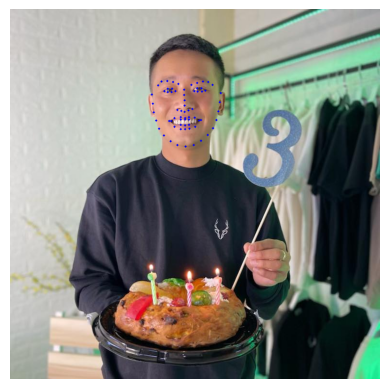

In [11]:
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition_models

# Load the pre-trained face detector and shape predictor models from dlib
face_detector = dlib.get_frontal_face_detector()

predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)
# Load the image file
img = cv2.imread("./dataset/00004/ql2.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_detector(gray)

# Iterate over each detected face
for face in faces:
    # Get the landmarks/parts for the face
    landmarks = pose_predictor_68_point(img, face)
    
    # Draw circles on the landmarks
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(img, (x, y), 2, (255, 0, 0), -1)

# Display the image with landmarks using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()

In [12]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [13]:
# List of available backends, models, and distance metrics
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface"]
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
metrics = ["cosine", "euclidean", "euclidean_l2"]

In [ ]:
def realtime_face_recognition():
    # Define a video capture object
    vid = cv2.VideoCapture(0)

    while True:
        # Capture the video frame by frame
        ret, frame = vid.read()

        # Perform face recognition on the captured frame
        # Find faces and identify people using a specific model and distance metric
        people = DeepFace.find(img_path=frame, db_path="dataset/", model_name=models[2], distance_metric=metrics[2], enforce_detection=False)

        for person in people:
            # Retrieve the coordinates of the face bounding box
            x = person['source_x'][0]
            y = person['source_y'][0]
            w = person['source_w'][0]
            h = person['source_h'][0]

            # Draw a rectangle around the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Get the person's name and display it on the image
            name = person['identity'][0].split('/')[1]
            cv2.putText(frame, name, (x, y), cv2.FONT_ITALIC, 1, (0, 0, 255), 2)

        # Display the resulting frame
        cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
        cv2.resizeWindow('frame', 960, 720)
        cv2.imshow('frame', frame)

        # Check if the 'q' button is pressed to quit the program
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object and close all windows
    vid.release()
    cv2.destroyAllWindows()

# Perform real-time face recognition using the webcam
realtime_face_recognition()

24-11-25 04:35:59 - Found 56 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/56 [00:00<?, ?it/s]

24-11-25 04:36:02 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: C:\Users\Admin\.deepface\weights\facenet512_weights.h5
Finding representations:   0%|          | 0/56 [01:29<?, ?it/s]


KeyboardInterrupt: 